In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding
import numpy as np
from sklearn import preprocessing

We load our text

In [2]:
lyrics_txt=open('/kanye_west.txt').read()

We create a Tokenizer object to tokenize our text

In [3]:
tokenizer=tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(lyrics_txt.lower().split('\n'))

Now we generate our n-grams

In [4]:
sequences_list=lyrics_txt.split('\n')
tokenized_ngram_list=[]
for word_sequence in sequences_list:
  tokenized_sequence=tokenizer.texts_to_sequences([word_sequence])[0]
  #generate N-grams
  for i in range(1,len(tokenized_sequence)):
    n_gram=tokenized_sequence[:i+1]
    #print(n_gram)
    tokenized_ngram_list.append(n_gram)
#print(tokenized_ngram_list)
max_len=max([len(n_gram) for n_gram in tokenized_ngram_list])
#Now we pad the sequences
tokenized_ngram_list=tf.keras.utils.pad_sequences(tokenized_ngram_list,max_len,padding='pre')
tokenized_ngram_array=np.array(tokenized_ngram_list)
#print(tokenized_ngram_array)
#tokens_array=tf.keras.utils.pad_sequences(tokens_array)

Create the predictors and the labels

In [5]:
predictors,labels =tokenized_ngram_array[:,:-1],tokenized_ngram_array[:,-1]

In [6]:
#predictors

In [7]:
#labels.shape

encode the labels

In [8]:
y=keras.utils.to_categorical(labels,num_classes=len(tokenizer.word_index)+1)
#y

Create a model

In [9]:
from keras.src.layers import GlobalMaxPool1D
from keras.src.layers.rnn import Bidirectional
def create_model(vocabulary_size,seq_length):
  model=keras.Sequential(name='mymodel')
  model.add(Embedding(vocabulary_size,100,input_length=seq_length))
  model.add(Bidirectional(LSTM(150,return_sequences=True)))
  model.add(GlobalMaxPool1D())
  model.add(Dense(vocabulary_size,activation="softmax"))
  model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
  model.summary()
  return model





In [10]:
vocabulary_size=len(tokenizer.word_index) + 1
seq_length=predictors.shape[1]
model=create_model(vocabulary_size,seq_length)

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 238, 100)          614600    
                                                                 
 bidirectional (Bidirection  (None, 238, 300)          301200    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 300)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 6146)              1849946   
                                                                 
Total params: 2765746 (10.55 MB)
Trainable params: 2765746 (10.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1876/1876 [==============================] - 65s 30ms/step - loss: 6.4145 - accuracy: 0.0696
Epoch 2/10
1876/1876 [==============================] - 41s 22ms/step - loss: 5.5806 - accuracy: 0.0999
Epoch 3/10
1876/1876 [==============================] - 42s 22ms/step - loss: 5.1047 - accuracy: 0.1296
Epoch 4/10
1876/1876 [==============================] - 41s 22ms/step - loss: 4.7043 - accuracy: 0.1623
Epoch 5/10
1876/1876 [==============================] - 41s 22ms/step - loss: 4.3326 - accuracy: 0.1968
Epoch 6/10
1876/1876 [==============================] - 42s 22ms/step - loss: 3.9743 - accuracy: 0.2314
Epoch 7/10
1876/1876 [==============================] - 41s 22ms/step - loss: 3.7313 - accuracy: 0.2625
Epoch 8/10
1876/1876 [==============================] - 42s 22ms/step - loss: 3.4283 - accuracy: 0.3024
Epoch 9/10
1876/1876 [==============================] - 41s 22ms/step - loss: 3.2276 - accuracy: 0.3332
Epoch 10/10
1876/1876 [==============================] - 42s 22m

<function matplotlib.pyplot.show(close=None, block=None)>

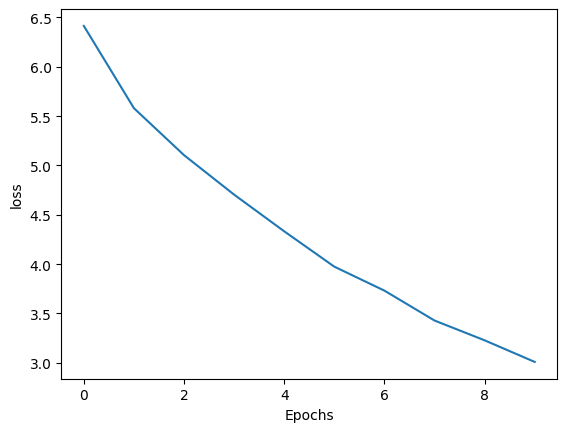

In [11]:
from keras.src.callbacks import EarlyStopping
es=EarlyStopping(monitor='loss',min_delta=0,patience=10,verbose=0,mode='auto')
history=model.fit(predictors,y,epochs=10,verbose=1,callbacks=[es],shuffle=False)
model.save('kanye')
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.show

A function to generate lyrics

In [14]:
model=keras.models.load_model('kanye')
seed_text="who are you"
next_word=2

for _ in range(next_word):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=keras.utils.pad_sequences([token_list],maxlen=predictors.shape[1],padding="pre")
  predicted_token=model.predict(token_list,verbose=0)
  predicted_word_id=np.argmax(predicted_token)
  output_word=""
  for word, index in tokenizer.word_index.items():
    if(index==predicted_word_id):
      output_word=word
      break
  seed_text+=" "+output_word
print(seed_text)


who are you gonna be
